# Experiment 1: Clustering

In [3]:
import sys
import pathlib

# Get project root (parent of generation/)
project_root = pathlib.Path().resolve().parent
sys.path.insert(0, str(project_root))

### Step 0 : Loading data

In [22]:
exp_folder = "/home/think/Desktop/BODEGA_AURRERA/Avances_2025-09-01_iter2"

In [23]:
from pathlib import Path

In [30]:
mother_folder = Path(exp_folder)
allowed = ['1']

for folder in mother_folder.iterdir():
    if folder.is_dir():
        model_name = folder.name
        for case_folder in allowed:
            case_path = folder / case_folder
            if case_path.exists() and case_path.is_dir():
                # get all csv files
                csv_files = list(case_path.glob("*.csv"))
                # sort by the number at the end of the filename
                csv_files.sort(key=lambda x: int(x.stem.split('_')[-1]))
                for csv_file in csv_files:
                    print(csv_file.name)


sprott_sample_0.csv
sprott_sample_1.csv
sprott_sample_2.csv
sprott_sample_3.csv
sprott_sample_4.csv
aizawa_sample_0.csv
aizawa_sample_1.csv
aizawa_sample_2.csv
aizawa_sample_3.csv
aizawa_sample_4.csv
dadras_sample_0.csv
dadras_sample_1.csv
dadras_sample_2.csv
dadras_sample_3.csv
dadras_sample_4.csv
lorenz63_sample_0.csv
lorenz63_sample_1.csv
lorenz63_sample_2.csv
lorenz63_sample_3.csv
lorenz63_sample_4.csv
rossler_sample_0.csv
rossler_sample_1.csv
rossler_sample_2.csv
rossler_sample_3.csv
rossler_sample_4.csv


### Step 1: Feature Extraction

In [ ]:
from pathlib import Path
import pandas as pd
import nolds

mother_folder = Path(exp_folder)
allowed = ['1']
max_files = 1  
file_counter = 0

for folder in mother_folder.iterdir():
    if folder.is_dir():
        model_name = folder.name
        for case_folder in allowed:
            case_path = folder / case_folder
            if case_path.exists() and case_path.is_dir():
                csv_files = list(case_path.glob("*.csv"))
                csv_files.sort(key=lambda x: int(x.stem.split('_')[-1]))
                
                for csv_file in csv_files:
                    file_counter += 1
                    print(f"[{file_counter}] {csv_file.name}")
                    
                    # Read CSV
                    df = pd.read_csv(csv_file)
                    # Preprocess
                    df.drop(df.columns[[0]], axis=1, inplace=True)
                    # Feature Extraction
                    lyap = nolds.lyap_r(df['y'])
                    print("Lyapunov Exponent:", lyap)
                    corr_dim = nolds.corr_dim(df['y'], emb_dim=10)
                    print("Correlation Dimension:", corr_dim)
                    ap_entropy = nolds.sampen(df['y'])
                    print("Approximate Kolmogorov Entropy:", ap_entropy)


                    
                    if file_counter >= max_files:
                        break  # stop after first N files
            if file_counter >= max_files:
                break
    if file_counter >= max_files:
        break

print(f"Processed {file_counter} files")


[1] sprott_sample_0.csv
Lyapunov Exponent: 0.0024750278831512863
Correlation Dimension: 1.6218573343695508
Approximate Kolmogorov Entropy: 0.07963450022214554
Processed 1 files


In [36]:
from pathlib import Path
import pandas as pd
import nolds

mother_folder = Path(exp_folder)
allowed = ['1']
max_files = 1  
file_counter = 0

# List to store results
results = []

for folder in mother_folder.iterdir():
    if folder.is_dir():
        model_name = folder.name
        for case_folder in allowed:
            case_path = folder / case_folder
            if case_path.exists() and case_path.is_dir():
                csv_files = list(case_path.glob("*.csv"))
                csv_files.sort(key=lambda x: int(x.stem.split('_')[-1]))
                
                for csv_file in csv_files:
                    file_counter += 1
                    print(f"[{file_counter}] {csv_file.name}")
                    
                    # Read CSV
                    df = pd.read_csv(csv_file)
                    # Preprocess
                    df.drop(df.columns[[0]], axis=1, inplace=True)
                    # Feature Extraction
                    lyap = nolds.lyap_r(df['y'])
                    corr_dim = nolds.corr_dim(df['y'], emb_dim=10)
                    ap_entropy = nolds.sampen(df['y'])
                    print("Lyapunov Exponent:", lyap)
                    print("Correlation Dimension:", corr_dim)
                    print("Approximate Kolmogorov Entropy:", ap_entropy)
                    
                    # Store in results list
                    results.append({
                        'id': file_counter,
                        'filename': csv_file.name,
                        'lyapunov_exponent': lyap,
                        'correlation_dimension': corr_dim,
                        'approx_kolmogorov_entropy': ap_entropy
                    })
                    
                    if file_counter >= max_files:
                        break  # stop after first N files
            if file_counter >= max_files:
                break
    if file_counter >= max_files:
        break

# Convert to DataFrame
features_df = pd.DataFrame(results)
print(features_df)


[1] sprott_sample_0.csv
Lyapunov Exponent: 0.0024750278831512863
Correlation Dimension: 1.6218573343695508
Approximate Kolmogorov Entropy: 0.07963450022214554
   id             filename  lyapunov_exponent  correlation_dimension  \
0   1  sprott_sample_0.csv           0.002475               1.621857   

   approx_kolmogorov_entropy  
0                   0.079635  


In [37]:
features_df

,id,filename,lyapunov_exponent,correlation_dimension,approx_kolmogorov_entropy
0,1,sprott_sample_0.csv,0.002475,1.621857,0.079635


### Conjunto 1: Mismos parametros, mismas condiciones inciales

In [39]:
from pathlib import Path
import pandas as pd
import nolds

mother_folder = Path(exp_folder)
# Set allowed to None to include all case folders
allowed = ['1']  # or ['1'] to restrict
max_files = None  # or 1 to test
file_counter = 0

results = []

for folder in mother_folder.iterdir():
    if folder.is_dir():
        model_name = folder.name
        # Use all folders if allowed is None
        case_folders = allowed if allowed is not None else [f.name for f in folder.iterdir() if f.is_dir()]
        
        for case_folder in case_folders:
            case_path = folder / case_folder
            if case_path.exists() and case_path.is_dir():
                csv_files = list(case_path.glob("*.csv"))
                csv_files.sort(key=lambda x: int(x.stem.split('_')[-1]))
                
                for csv_file in csv_files:
                    file_counter += 1
                    print(f"[{file_counter}] {csv_file.name}")
                    
                    # Read CSV
                    df = pd.read_csv(csv_file)
                    df.drop(df.columns[[0]], axis=1, inplace=True)
                    
                    # Feature extraction
                    lyap = nolds.lyap_r(df['y'])
                    corr_dim = nolds.corr_dim(df['y'], emb_dim=10)
                    ap_entropy = nolds.sampen(df['y'])
                    
                    # Store in results list
                    results.append({
                        'id': file_counter,
                        'filename': csv_file.name,
                        'lyapunov_exponent': lyap,
                        'correlation_dimension': corr_dim,
                        'approx_kolmogorov_entropy': ap_entropy
                    })
                    
                    if max_files is not None and file_counter >= max_files:
                        break
            if max_files is not None and file_counter >= max_files:
                break
    if max_files is not None and file_counter >= max_files:
        break

features_df = pd.DataFrame(results)
print(features_df)


[1] sprott_sample_0.csv
[2] sprott_sample_1.csv


/home/think/anaconda3/lib/python3.12/site-packages/nolds/measures.py:292: RuntimeWarning: autocorrelation declined too slowly to find suitable lag, setting lag to 953
  warnings.warn(msg.format(lag), RuntimeWarning)


[3] sprott_sample_2.csv


/home/think/anaconda3/lib/python3.12/site-packages/nolds/measures.py:292: RuntimeWarning: autocorrelation declined too slowly to find suitable lag, setting lag to 878
  warnings.warn(msg.format(lag), RuntimeWarning)


[4] sprott_sample_3.csv


/home/think/anaconda3/lib/python3.12/site-packages/nolds/measures.py:292: RuntimeWarning: autocorrelation declined too slowly to find suitable lag, setting lag to 907
  warnings.warn(msg.format(lag), RuntimeWarning)


[5] sprott_sample_4.csv


/home/think/anaconda3/lib/python3.12/site-packages/nolds/measures.py:292: RuntimeWarning: autocorrelation declined too slowly to find suitable lag, setting lag to 943
  warnings.warn(msg.format(lag), RuntimeWarning)


[6] aizawa_sample_0.csv
[7] aizawa_sample_1.csv
[8] aizawa_sample_2.csv
[9] aizawa_sample_3.csv
[10] aizawa_sample_4.csv
[11] dadras_sample_0.csv
[12] dadras_sample_1.csv
[13] dadras_sample_2.csv
[14] dadras_sample_3.csv
[15] dadras_sample_4.csv
[16] lorenz63_sample_0.csv


/home/think/anaconda3/lib/python3.12/site-packages/nolds/measures.py:263: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 2500
  warnings.warn(msg.format(min_tsep), RuntimeWarning)
/home/think/anaconda3/lib/python3.12/site-packages/nolds/measures.py:292: RuntimeWarning: autocorrelation declined too slowly to find suitable lag, setting lag to 552
  warnings.warn(msg.format(lag), RuntimeWarning)


[17] lorenz63_sample_1.csv


/home/think/anaconda3/lib/python3.12/site-packages/nolds/measures.py:263: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 2500
  warnings.warn(msg.format(min_tsep), RuntimeWarning)
/home/think/anaconda3/lib/python3.12/site-packages/nolds/measures.py:292: RuntimeWarning: autocorrelation declined too slowly to find suitable lag, setting lag to 552
  warnings.warn(msg.format(lag), RuntimeWarning)


[18] lorenz63_sample_2.csv


/home/think/anaconda3/lib/python3.12/site-packages/nolds/measures.py:263: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 2500
  warnings.warn(msg.format(min_tsep), RuntimeWarning)
/home/think/anaconda3/lib/python3.12/site-packages/nolds/measures.py:292: RuntimeWarning: autocorrelation declined too slowly to find suitable lag, setting lag to 552
  warnings.warn(msg.format(lag), RuntimeWarning)


[19] lorenz63_sample_3.csv


/home/think/anaconda3/lib/python3.12/site-packages/nolds/measures.py:263: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 2500
  warnings.warn(msg.format(min_tsep), RuntimeWarning)
/home/think/anaconda3/lib/python3.12/site-packages/nolds/measures.py:292: RuntimeWarning: autocorrelation declined too slowly to find suitable lag, setting lag to 552
  warnings.warn(msg.format(lag), RuntimeWarning)


[20] lorenz63_sample_4.csv


/home/think/anaconda3/lib/python3.12/site-packages/nolds/measures.py:263: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 2500
  warnings.warn(msg.format(min_tsep), RuntimeWarning)
/home/think/anaconda3/lib/python3.12/site-packages/nolds/measures.py:292: RuntimeWarning: autocorrelation declined too slowly to find suitable lag, setting lag to 552
  warnings.warn(msg.format(lag), RuntimeWarning)


[21] rossler_sample_0.csv
[22] rossler_sample_1.csv
[23] rossler_sample_2.csv
[24] rossler_sample_3.csv
[25] rossler_sample_4.csv
    id               filename  lyapunov_exponent  correlation_dimension  \
0    1    sprott_sample_0.csv           0.002475               1.621857   
1    2    sprott_sample_1.csv           0.005214               1.548413   
2    3    sprott_sample_2.csv           0.005997               0.888695   
3    4    sprott_sample_3.csv           0.011511               0.803402   
4    5    sprott_sample_4.csv           0.003602               0.868303   
5    6    aizawa_sample_0.csv           0.000675               1.314267   
6    7    aizawa_sample_1.csv           0.000673               1.549369   
7    8    aizawa_sample_2.csv           0.000742               1.582204   
8    9    aizawa_sample_3.csv           0.001185               1.357957   
9   10    aizawa_sample_4.csv           0.002692               0.011549   
10  11    dadras_sample_0.csv           0.014

In [40]:
features_df

,id,filename,lyapunov_exponent,correlation_dimension,approx_kolmogorov_entropy
0,1,sprott_sample_0.csv,0.002475,1.621857,7.963450e-02
1,2,sprott_sample_1.csv,0.005214,1.548413,6.651578e-02
2,3,sprott_sample_2.csv,0.005997,0.888695,1.376401e-02
3,4,sprott_sample_3.csv,0.011511,0.803402,9.868950e-03
4,5,sprott_sample_4.csv,0.003602,0.868303,1.155965e-02
5,6,aizawa_sample_0.csv,0.000675,1.314267,6.710654e-02
6,7,aizawa_sample_1.csv,0.000673,1.549369,8.581147e-02
7,8,aizawa_sample_2.csv,0.000742,1.582204,8.959706e-02
8,9,aizawa_sample_3.csv,0.001185,1.357957,7.111193e-02
9,10,aizawa_sample_4.csv,0.002692,0.011549,4.155622e-04


In [41]:
exp_folder = Path("/home/think/Desktop/BODEGA_AURRERA/Avances_2025-09-01_iter2")
features_folder = exp_folder / "features"
features_folder.mkdir(exist_ok=True)

In [42]:
# Example for set 1
features_df.to_csv(features_folder / "chaos_features_set_1.csv", index=False)

### Conjunto 2: Diferentes parametros, mismas condiciones inciales

In [43]:
from pathlib import Path
import pandas as pd
import nolds

mother_folder = Path(exp_folder)
# Set allowed to None to include all case folders
allowed = ['2']  # or ['1'] to restrict
max_files = None  # or 1 to test
file_counter = 0

results = []

for folder in mother_folder.iterdir():
    if folder.is_dir():
        model_name = folder.name
        # Use all folders if allowed is None
        case_folders = allowed if allowed is not None else [f.name for f in folder.iterdir() if f.is_dir()]
        
        for case_folder in case_folders:
            case_path = folder / case_folder
            if case_path.exists() and case_path.is_dir():
                csv_files = list(case_path.glob("*.csv"))
                csv_files.sort(key=lambda x: int(x.stem.split('_')[-1]))
                
                for csv_file in csv_files:
                    file_counter += 1
                    print(f"[{file_counter}] {csv_file.name}")
                    
                    # Read CSV
                    df = pd.read_csv(csv_file)
                    df.drop(df.columns[[0]], axis=1, inplace=True)
                    
                    # Feature extraction
                    lyap = nolds.lyap_r(df['y'])
                    corr_dim = nolds.corr_dim(df['y'], emb_dim=10)
                    ap_entropy = nolds.sampen(df['y'])
                    
                    # Store in results list
                    results.append({
                        'id': file_counter,
                        'filename': csv_file.name,
                        'lyapunov_exponent': lyap,
                        'correlation_dimension': corr_dim,
                        'approx_kolmogorov_entropy': ap_entropy
                    })
                    
                    if max_files is not None and file_counter >= max_files:
                        break
            if max_files is not None and file_counter >= max_files:
                break
    if max_files is not None and file_counter >= max_files:
        break

features_df_2 = pd.DataFrame(results)
print(features_df_2)

[1] sprott_sample_0.csv
[2] sprott_sample_1.csv
[3] sprott_sample_2.csv
[4] sprott_sample_3.csv
[5] sprott_sample_4.csv
[6] aizawa_sample_0.csv
[7] aizawa_sample_1.csv
[8] aizawa_sample_2.csv
[9] aizawa_sample_3.csv
[10] aizawa_sample_4.csv
[11] dadras_sample_0.csv
[12] dadras_sample_1.csv
[13] dadras_sample_2.csv
[14] dadras_sample_3.csv
[15] dadras_sample_4.csv
[16] lorenz63_sample_0.csv
[17] lorenz63_sample_1.csv
[18] lorenz63_sample_2.csv
[19] lorenz63_sample_3.csv
[20] lorenz63_sample_4.csv
[21] rossler_sample_0.csv
[22] rossler_sample_1.csv
[23] rossler_sample_2.csv
[24] rossler_sample_3.csv
[25] rossler_sample_4.csv
    id               filename  lyapunov_exponent  correlation_dimension  \
0    1    sprott_sample_0.csv           0.002475               1.621857   
1    2    sprott_sample_1.csv           0.003333               1.501873   
2    3    sprott_sample_2.csv           0.000666               1.496675   
3    4    sprott_sample_3.csv           0.001988               1.4522

In [44]:
# Example for set 2
features_df_2.to_csv(features_folder / "chaos_features_set_2.csv", index=False)

## Clustering

In [61]:
from scripts.utils.topo import higher_visualization

### Subplots features

In [ ]:
import matplotlib.pyplot as plt

def plot_features_subplots(df, title_prefix="Feature"):
    """
    Plots all columns except the first one in a single row of subplots.
    
    Args:
        df : pd.DataFrame
            DataFrame where the first column is assumed to be labels/IDs.
        title_prefix : str
            Prefix for each subplot title.
    """
    cols = df.columns[1:]  # skip the first column
    n = len(cols)
    
    fig, axes = plt.subplots(1, n, figsize=(5*n, 4))  # width scales with n
    if n == 1:
        axes = [axes]  # ensure iterable
    
    for ax, col in zip(axes, cols):
        ax.plot(df[col], label=col)
        ax.set_xlabel("Index")
        ax.set_ylabel(col)
        ax.set_title(f"{title_prefix}: {col}")
        ax.legend()
        ax.grid(True)
    
    plt.tight_layout()
    plt.show()

### One plot all features

In [91]:
import matplotlib.pyplot as plt

def plot_all_features(df, title="Features over samples"):
    """
    Plots all columns of a DataFrame except the first one in a single plot.
    
    Args:
        df : pd.DataFrame
            First column is assumed to be labels/IDs and will be skipped.
        title : str
            Title for the plot.
    """
    cols = df.columns[1:]  # skip first column
    
    plt.figure(figsize=(10, 5))
    
    for col in cols:
        plt.plot(df[col], label=col)
    
    plt.xlabel("Index")
    plt.ylabel("Value")
    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.show()

### Set 1

In [47]:
exp_folder = Path("/home/think/Desktop/BODEGA_AURRERA/Avances_2025-09-01_iter2")
features_folder = exp_folder / "features"

In [58]:
features_set_1 = pd.read_csv(features_folder / "chaos_features_set_1.csv")

In [ ]:
features_set_1.drop(features_set_1.columns[[0]], axis=1, inplace=True)
features_set_1

In [62]:
from matplotlib.colors import ListedColormap

my_colors = ['red', 'blue', 'green', 'purple', 'orange','black','cyan']
my_cmap = ListedColormap(my_colors)

/home/think/anaconda3/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/think/anaconda3/lib/python3.12/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


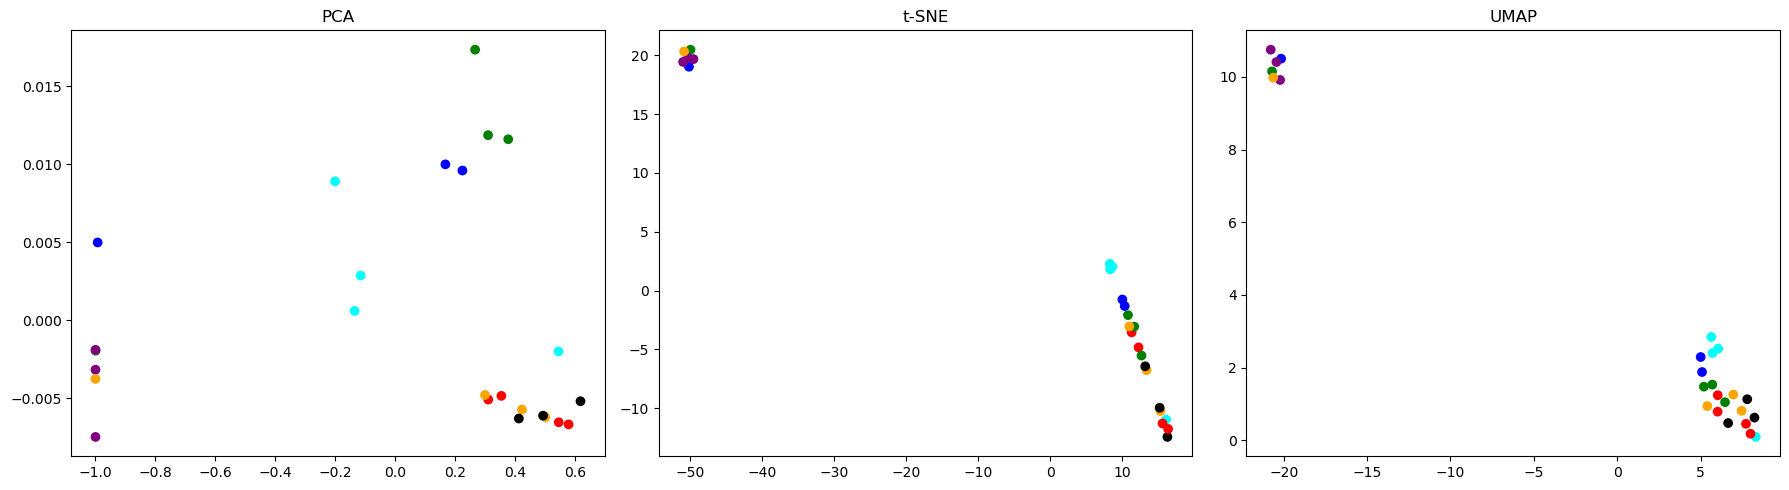

In [78]:
higher_visualization(features_set_1[["filename", "lyapunov_exponent","correlation_dimension"]], cmap = my_cmap)

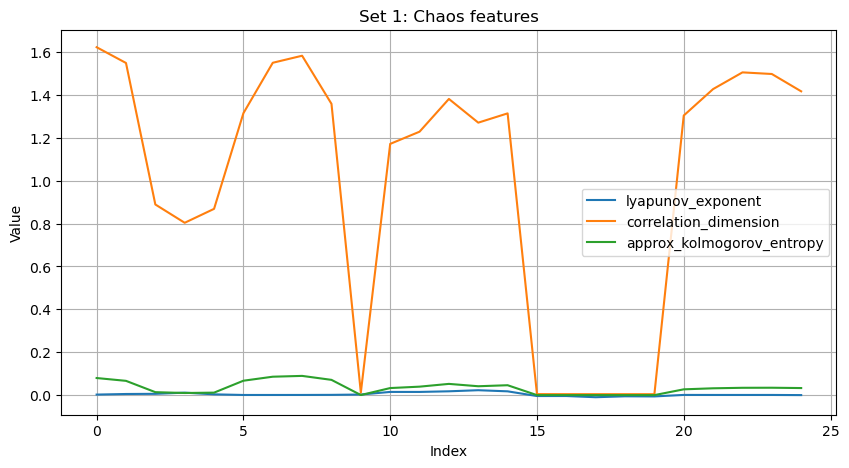

In [92]:
plot_all_features(features_set_1, title="Set 1: Chaos features")

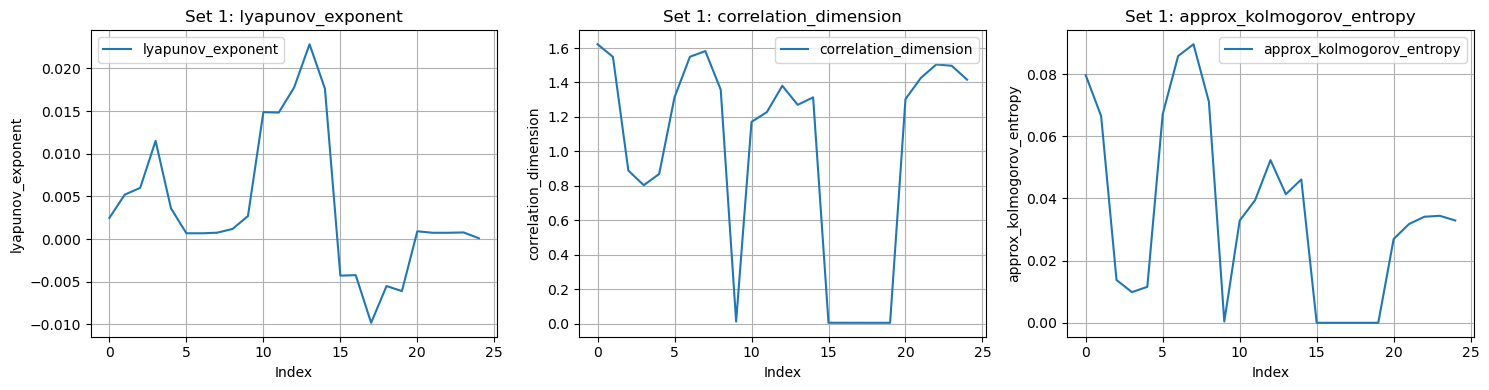

In [85]:
plot_features_subplots(features_set_1, title_prefix="Set 1")

### Set 2

In [66]:
features_set_2 = pd.read_csv(features_folder / "chaos_features_set_2.csv")

In [ ]:
features_set_2.drop(features_set_2.columns[[0]], axis=1, inplace=True)
features_set_2

/home/think/anaconda3/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/think/anaconda3/lib/python3.12/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


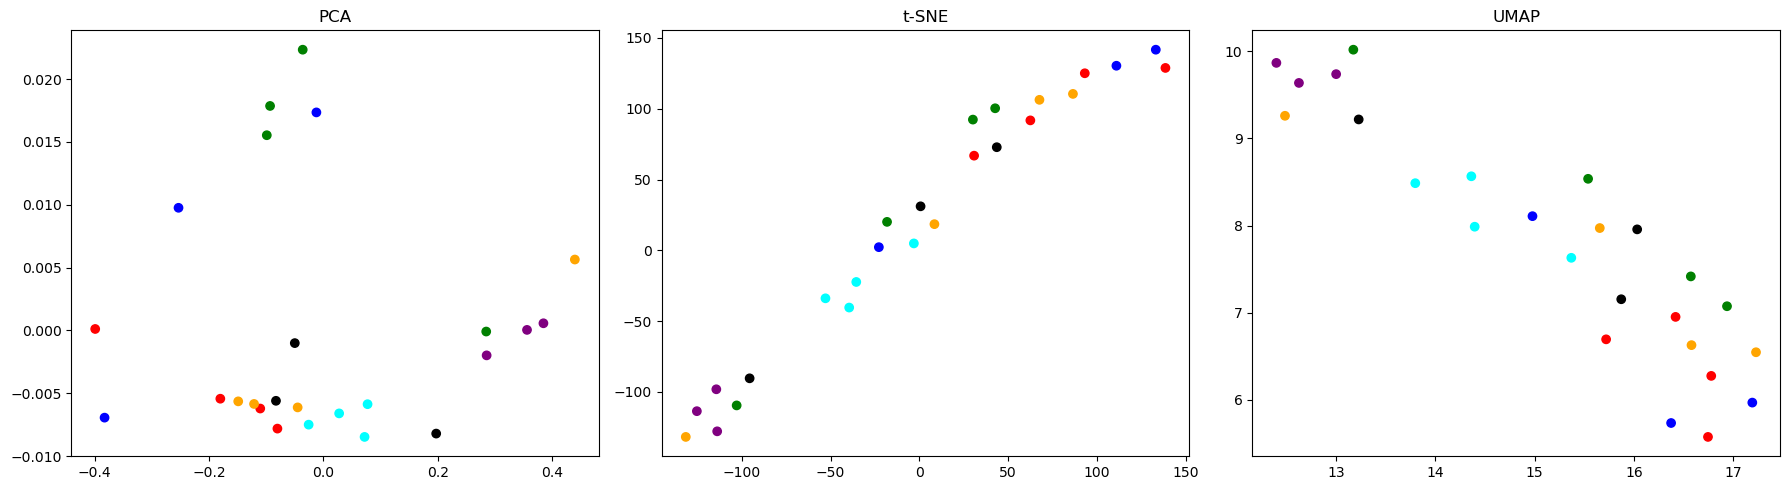

In [81]:
higher_visualization(features_set_2[["filename", "lyapunov_exponent","correlation_dimension"]], cmap = my_cmap)

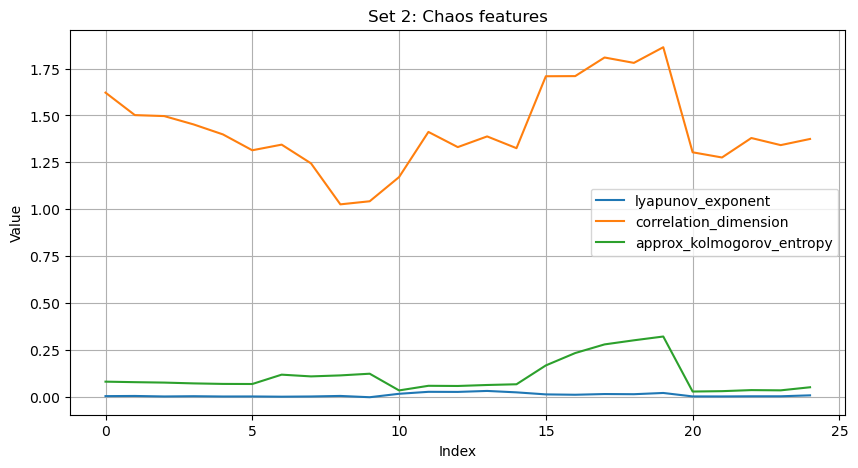

In [88]:
plot_all_features(features_set_2, title="Set 2: Chaos features")

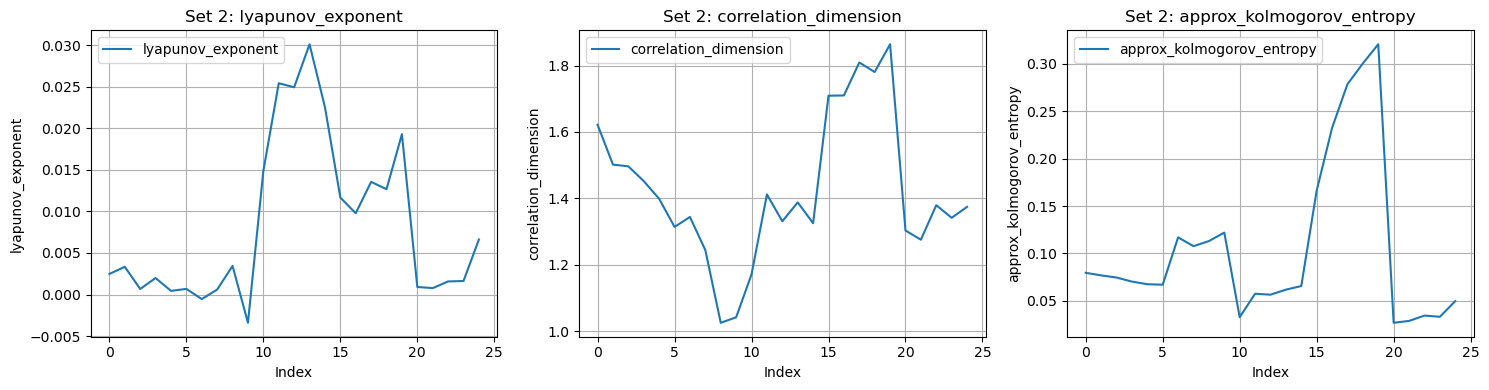

In [86]:
plot_features_subplots(features_set_2, title_prefix="Set 2")

### Feature Extraction: tsfresh

In [ ]:
def tesefresco(df):
  df_prep = df.copy().reset_index()
  df_prep_new = df_prep[["date", "y"]]
  df_prep_new['date'] = 1
  return df_prep_new

In [ ]:
from pathlib import Path
import pandas as pd
import nolds

mother_folder = Path(exp_folder)
# Set allowed to None to include all case folders
allowed = ['1']  # or ['1'] to restrict
max_files = None  # or 1 to test
file_counter = 0

results = []

for folder in mother_folder.iterdir():
    if folder.is_dir():
        model_name = folder.name
        # Use all folders if allowed is None
        case_folders = allowed if allowed is not None else [f.name for f in folder.iterdir() if f.is_dir()]
        
        for case_folder in case_folders:
            case_path = folder / case_folder
            if case_path.exists() and case_path.is_dir():
                csv_files = list(case_path.glob("*.csv"))
                csv_files.sort(key=lambda x: int(x.stem.split('_')[-1]))
                
                for csv_file in csv_files:
                    file_counter += 1
                    print(f"[{file_counter}] {csv_file.name}")
                    
                    # Read CSV
                    df = pd.read_csv(csv_file)
                    df.drop(df.columns[[0]], axis=1, inplace=True)
                    
                    # Feature extraction
                    lyap = nolds.lyap_r(df['y'])
                    corr_dim = nolds.corr_dim(df['y'], emb_dim=10)
                    ap_entropy = nolds.sampen(df['y'])
                    
                    # Store in results list
                    results.append({
                        'id': file_counter,
                        'filename': csv_file.name,
                        'lyapunov_exponent': lyap,
                        'correlation_dimension': corr_dim,
                        'approx_kolmogorov_entropy': ap_entropy
                    })
                    
                    if max_files is not None and file_counter >= max_files:
                        break
            if max_files is not None and file_counter >= max_files:
                break
    if max_files is not None and file_counter >= max_files:
        break

features_df = pd.DataFrame(results)
print(features_df)

### Network

In [1]:
import numpy as np
import networkx as nx
from scipy.spatial.distance import cdist

# -----------------------------
# Wrapper function
# -----------------------------
def ts_to_network(df, method="recurrence", emb_dim=3, tau=1, eps=0.05):
    """
    Convert a single-column DataFrame (time series) into a network.
    
    Args:
        df : pd.DataFrame
            Single-column DataFrame containing the time series.
        method : str
            "recurrence" or "visibility"
        emb_dim : int
            Embedding dimension (for recurrence)
        tau : int
            Time-delay (for recurrence)
        eps : float
            Threshold for recurrence network
    
    Returns:
        networkx.Graph : the network
        dict : dictionary of parameters used
    """
    ts = df.iloc[:, 0].to_numpy()
    
    params = {"method": method, "emb_dim": emb_dim, "tau": tau, "eps": eps, "length": len(ts)}
    
    if method == "recurrence":
        # Embedding
        n = len(ts)
        if n - (emb_dim - 1) * tau <= 0:
            raise ValueError("Time series too short for embedding parameters")
        shape = n - (emb_dim - 1) * tau
        emb = np.empty((shape, emb_dim))
        for i in range(emb_dim):
            emb[:, i] = ts[i * tau : i * tau + shape]
        
        # Recurrence network
        dist = cdist(emb, emb)
        A = (dist < eps).astype(int)
        np.fill_diagonal(A, 0)
        G = nx.from_numpy_array(A)
        
        params["embedding"] = emb
        params["A_shape"] = A.shape
        
    elif method == "visibility":
        n = len(ts)
        G = nx.Graph()
        G.add_nodes_from(range(n))
        for i in range(n):
            for j in range(i + 1, n):
                if all(ts[k] < min(ts[i], ts[j]) for k in range(i + 1, j)):
                    G.add_edge(i, j)
    else:
        raise ValueError("method must be 'recurrence' or 'visibility'")
    
    return G, params

In [7]:
from pathlib import Path
import pandas as pd

In [5]:
exp_folder = Path("/home/think/Desktop/BODEGA_AURRERA/Avances_2025-09-01_iter2")

In [8]:
lorenz = pd.read_csv(exp_folder/"lorenz63"/"1"/"lorenz63_sample_1.csv")


In [9]:
lorenz.drop(lorenz.columns[[0, 2, 3]], axis=1, inplace=True)

In [10]:
lorenz[:200]

,y
0,0.325000
1,0.325198
2,0.325792
3,0.326777
4,0.328141
...,...
195,3.923159
196,3.963739
197,4.004386
198,4.045086


In [17]:
# Suppose df_lorenz is your DataFrame with a single column "x"
G, params = ts_to_network(lorenz[:3000], method="recurrence", emb_dim=3, tau=2, eps=0.05)
print(G.number_of_nodes(), G.number_of_edges())
print(params)

2996 3545528
{'method': 'recurrence', 'emb_dim': 3, 'tau': 2, 'eps': 0.05, 'length': 3000, 'embedding': array([[0.325     , 0.32579192, 0.32814107],
       [0.32519826, 0.32677681, 0.32986303],
       [0.32579192, 0.32814107, 0.33192231],
       ...,
       [6.83083714, 6.83087292, 6.83123933],
       [6.83076788, 6.83105597, 6.83138317],
       [6.83087292, 6.83123933, 6.83146194]]), 'A_shape': (2996, 2996)}


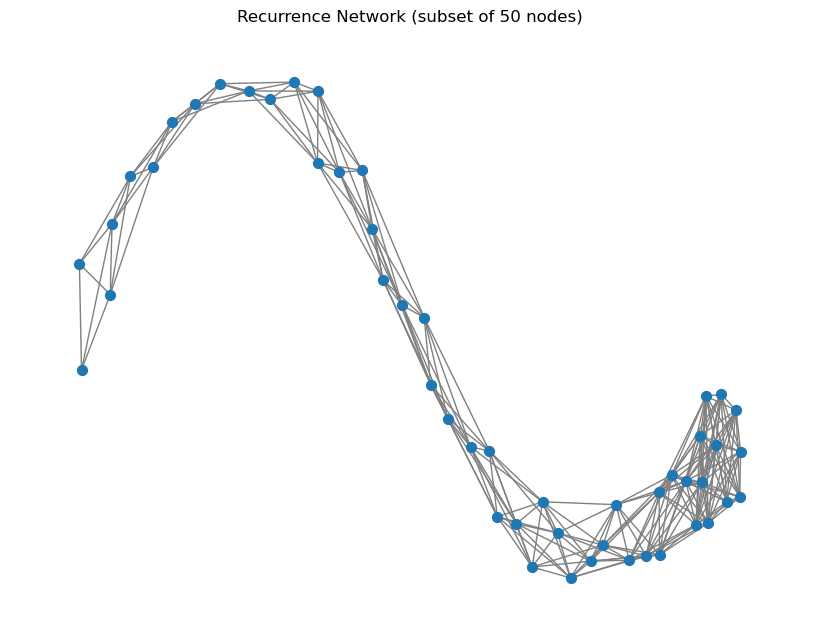

In [18]:
import matplotlib.pyplot as plt
import networkx as nx

# Plot a subset of nodes (e.g., first 50 nodes)
sub_nodes = list(G.nodes)[:50]
G_sub = G.subgraph(sub_nodes)

plt.figure(figsize=(8,6))
nx.draw(G_sub, node_size=50, edge_color="gray")
plt.title("Recurrence Network (subset of 50 nodes)")
plt.show()

